<a href="https://colab.research.google.com/github/JamesGrooms/drowsy_detection/blob/main/Model_Load_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('/content/drive/My Drive/Colab/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Colab/model_best_weights.h5")

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 22,853,924
Trainable params: 1,051,140
Non-trainable params: 21,802,784
____________________________________

In [ ]:
train_dir = "/content/drive/My Drive/Colab/train"
test_size = len("/content/drive/My Drive/Colab/train")
image_size=224  #for the inception model
image_path= train_dir

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
                        rescale=1./255, # normalize pixel values between 0-1
                        validation_split=0.1,
                        horizontal_flip=True, # horizontal transposition
                        width_shift_range=0.2, # shift the weidth of the image 20%
                        height_shift_range=0.2, # shift the height of the image 20%
                        shear_range=0.2,
                        rotation_range=40, # random rotation at 40 degrees
                        fill_mode='nearest',
                        brightness_range=(0.1, 0.9)  # specify the range in which to decrease/increase brightness
)

train_generator=train_datagen.flow_from_directory(
                        image_path, 
                        target_size=(image_size,image_size),
                        subset='training',
                        shuffle=True,
                        batch_size=64,
                        class_mode='categorical',
                        
                        )

Found 2223 images belonging to 4 classes.


In [ ]:
test_dir = "/content/drive/My Drive/Colab/test"
test_size = len("/content/drive/My Drive/Colab/test")
image_size=224  #for the inception model
image_path= test_dir

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_generator = ImageDataGenerator(rescale=1/255.)

testgen = test_generator.flow_from_directory(image_path, 
                                             target_size=(image_size,image_size),
                                             batch_size=1,
                                             class_mode=None, 
                                             shuffle=False,
                                             seed=42,
                                             )

Found 433 images belonging to 4 classes.


In [ ]:
image_size=128
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_generator = ImageDataGenerator(rescale=1/255.)

scratchtestgen = test_generator.flow_from_directory(image_path, 
                                             target_size=(image_size,image_size),
                                             batch_size=1,
                                             class_mode=None, 
                                             shuffle=False,
                                             seed=42,
                                             )

Found 433 images belonging to 4 classes.


In [ ]:
# load json and create model
json_file = open('/content/drive/My Drive/Colab/scratch_model.json', 'r')
loaded_scratch_model_json = json_file.read()
json_file.close()
loaded_scratch_model = model_from_json(loaded_scratch_model_json)
# load weights into new model
loaded_scratch_model.load_weights("/content/drive/My Drive/Colab/Scratch_model_best_weights.h5")

In [ ]:
import numpy as np
y_predict = np.argmax(loaded_model.predict(testgen), axis=-1)

class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = testgen.classes

In [ ]:
scratch_pred_classes = np.argmax(loaded_scratch_model.predict(scratchtestgen), axis=-1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import f1_score

def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T

    results.rename(columns={0: 'Precision', 1: 'Recall',
                            2: 'F1-Score', 3: 'Support'}, inplace=True)
    
    results.sort_values(by='F1-Score', ascending=False, inplace=True)                           
    global_acc = accuracy_score(y_true, y_preds)
    global_f1 = f1_score(y_true, y_preds, average='weighted')
    
    print("Overall Categorical Accuracy: {:.2f}%".format(global_acc*100))
    print("Overall Categorical F1-Score: {:.2f}%".format(global_f1*100))
    return results

def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = y_preds[idx]
        true_idx = y_true[idx]
                
        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

In [ ]:
class_indices

{0: 'Closed', 1: 'Open', 2: 'no_yawn', 3: 'yawn'}

In [ ]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

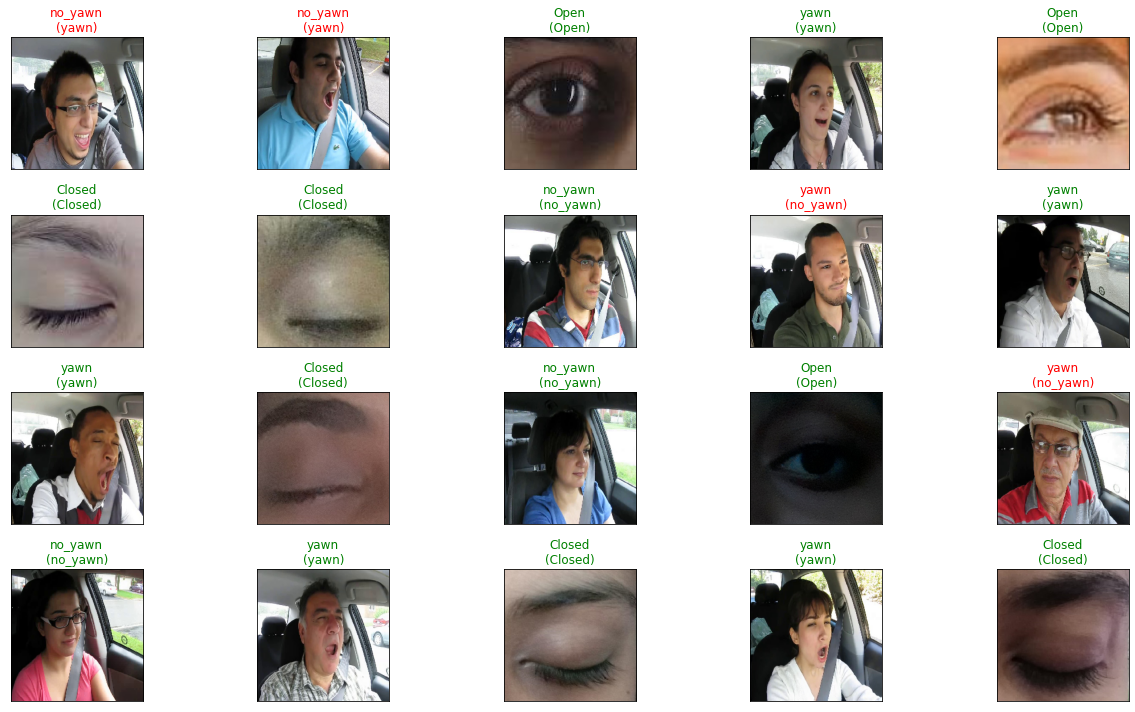

In [ ]:
plot_predictions(true_classes, y_predict, testgen, class_indices)

In [ ]:
display_results(true_classes, y_predict, class_indices) # Transfer (InceptionV3)

Overall Categorical Accuracy: 88.91%
Overall Categorical F1-Score: 88.87%


,Precision,Recall,F1-Score,Support
1,0.972973,0.990826,0.981818,109.0
0,0.990654,0.972477,0.981481,109.0
2,0.768595,0.853211,0.808696,109.0
3,0.829787,0.735849,0.780000,106.0


In [ ]:
display_results(true_classes, scratch_pred_classes, class_indices) # Custom

Overall Categorical Accuracy: 78.98%
Overall Categorical F1-Score: 77.41%


,Precision,Recall,F1-Score,Support
1,0.954545,0.963303,0.958904,109.0
0,0.962617,0.944954,0.953704,109.0
2,0.579882,0.899083,0.705036,109.0
3,0.765957,0.339623,0.470588,106.0


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the names of the ten classes
class_names = testgen.class_indices.keys()

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

plot_heatmap(true_classes, scratch_pred_classes, class_names, ax1, title="Custom CNN")    
plot_heatmap(true_classes, y_predict, class_names, ax2, title="Transfer Learning (InceptionV3)")    
#plot_heatmap(true_classes, vgg_pred_classes_ft, class_names, ax3, title="Transfer Learning (VGG16) with Fine-Tuning")    

fig.suptitle("Confusion Matrix Model Comparison", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=.90)
plt.show()